In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames[:3]:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dacon-bird/sample_submission.csv
/kaggle/input/dacon-bird/train.csv
/kaggle/input/dacon-bird/test.csv
/kaggle/input/dacon-bird/upscale_train/TRAIN_00248.png
/kaggle/input/dacon-bird/upscale_train/TRAIN_09978.png
/kaggle/input/dacon-bird/upscale_train/TRAIN_05653.png
/kaggle/input/dacon-bird/test/TEST_04038.jpg
/kaggle/input/dacon-bird/test/TEST_04342.jpg
/kaggle/input/dacon-bird/test/TEST_00733.jpg
/kaggle/input/dacon-bird/train/TRAIN_03637.jpg
/kaggle/input/dacon-bird/train/TRAIN_11814.jpg
/kaggle/input/dacon-bird/train/TRAIN_14358.jpg


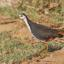

In [3]:
from PIL import Image
Image.open("/kaggle/input/dacon-bird/train/TRAIN_11814.jpg")

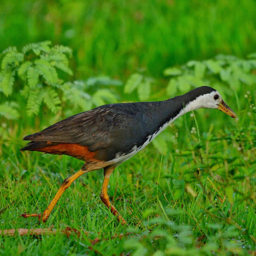

In [4]:
Image.open("/kaggle/input/dacon-bird/upscale_train/TRAIN_00248.png")

In [5]:
#정답 클래스가 어떻게 되어있는지 확인하어야한다 대회진행할때
train=pd.read_csv("/kaggle/input/dacon-bird/train.csv")
train

,img_path,upscale_img_path,label
0,./train/TRAIN_00000.jpg,./upscale_train/TRAIN_00000.png,Ruddy Shelduck
1,./train/TRAIN_00001.jpg,./upscale_train/TRAIN_00001.png,Gray Wagtail
2,./train/TRAIN_00002.jpg,./upscale_train/TRAIN_00002.png,Indian Peacock
3,./train/TRAIN_00003.jpg,./upscale_train/TRAIN_00003.png,Common Kingfisher
4,./train/TRAIN_00004.jpg,./upscale_train/TRAIN_00004.png,Common Kingfisher
...,...,...,...
15829,./train/TRAIN_15829.jpg,./upscale_train/TRAIN_15829.png,Common Myna
15830,./train/TRAIN_15830.jpg,./upscale_train/TRAIN_15830.png,Common Kingfisher
15831,./train/TRAIN_15831.jpg,./upscale_train/TRAIN_15831.png,Cattle Egret
15832,./train/TRAIN_15832.jpg,./upscale_train/TRAIN_15832.png,Ruddy Shelduck


In [6]:
train["label"].value_counts()

label
Ruddy Shelduck               671
White-Breasted Kingfisher    666
Northern Lapwing             663
Red-Wattled Lapwing          663
Gray Wagtail                 661
White Wagtail                659
Jungle Babbler               658
Sarus Crane                  657
Common Kingfisher            657
Common Rosefinch             653
White-Breasted Waterhen      649
Indian Grey Hornbill         645
Common Tailorbird            643
Brown-Headed Barbet          642
Cattle Egret                 641
Indian Roller                639
Indian Peacock               637
Hoopoe                       631
House Crow                   630
Common Myna                  630
Forest Wagtail               629
Rufous Treepie               616
Asian Green Bee-Eater        613
Coppersmith Barbet           550
Indian Pitta                 431
Name: count, dtype: int64

In [7]:
pd.options.display.max_colwidth=200
train["img_path"]="/kaggle/input/dacon-bird"+train["img_path"].str[1:]
train

,img_path,upscale_img_path,label
0,/kaggle/input/dacon-bird/train/TRAIN_00000.jpg,./upscale_train/TRAIN_00000.png,Ruddy Shelduck
1,/kaggle/input/dacon-bird/train/TRAIN_00001.jpg,./upscale_train/TRAIN_00001.png,Gray Wagtail
2,/kaggle/input/dacon-bird/train/TRAIN_00002.jpg,./upscale_train/TRAIN_00002.png,Indian Peacock
3,/kaggle/input/dacon-bird/train/TRAIN_00003.jpg,./upscale_train/TRAIN_00003.png,Common Kingfisher
4,/kaggle/input/dacon-bird/train/TRAIN_00004.jpg,./upscale_train/TRAIN_00004.png,Common Kingfisher
...,...,...,...
15829,/kaggle/input/dacon-bird/train/TRAIN_15829.jpg,./upscale_train/TRAIN_15829.png,Common Myna
15830,/kaggle/input/dacon-bird/train/TRAIN_15830.jpg,./upscale_train/TRAIN_15830.png,Common Kingfisher
15831,/kaggle/input/dacon-bird/train/TRAIN_15831.jpg,./upscale_train/TRAIN_15831.png,Cattle Egret
15832,/kaggle/input/dacon-bird/train/TRAIN_15832.jpg,./upscale_train/TRAIN_15832.png,Ruddy Shelduck


In [8]:
test=pd.read_csv("/kaggle/input/dacon-bird/test.csv")


In [9]:
pd.options.display.max_colwidth=200
test["img_path"]="/kaggle/input/dacon-bird"+test["img_path"].str[1:]
test

,id,img_path
0,TEST_00000,/kaggle/input/dacon-bird/test/TEST_00000.jpg
1,TEST_00001,/kaggle/input/dacon-bird/test/TEST_00001.jpg
2,TEST_00002,/kaggle/input/dacon-bird/test/TEST_00002.jpg
3,TEST_00003,/kaggle/input/dacon-bird/test/TEST_00003.jpg
4,TEST_00004,/kaggle/input/dacon-bird/test/TEST_00004.jpg
...,...,...
6781,TEST_06781,/kaggle/input/dacon-bird/test/TEST_06781.jpg
6782,TEST_06782,/kaggle/input/dacon-bird/test/TEST_06782.jpg
6783,TEST_06783,/kaggle/input/dacon-bird/test/TEST_06783.jpg
6784,TEST_06784,/kaggle/input/dacon-bird/test/TEST_06784.jpg


In [10]:
from sklearn.model_selection import KFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.efficientnet import EfficientNetB1
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the KFold cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

idg = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


#idg 에 train 에 만 넣어도
idg2=ImageDataGenerator()


#train_generator=idg.flow_from_dataframe(x_train,x_col="img_path",y_col="label")
#valid_generator=idg.flow_from_dataframe(x_valid,x_col="img_path",y_col="label")


2024-05-05 23:27:51.122182: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-05 23:27:51.122291: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-05 23:27:51.252296: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [11]:
# Track performance for each fold
fold_no = 1
result=0
for train_idx, valid_idx in kfold.split(train):
    # Split the data
    x_train, x_valid = train.iloc[train_idx], train.iloc[valid_idx]
    
    # Create generators
    train_generator = idg.flow_from_dataframe(x_train, x_col='img_path', y_col='label')
    valid_generator = idg2.flow_from_dataframe(x_valid, x_col='img_path', y_col='label')
    
    # Define the model architecture
    model = Sequential([
        EfficientNetB1(include_top=False, pooling='avg', weights='imagenet'),
        Dense(25, activation='softmax')
    ])
    model.compile(metrics=['acc'], optimizer='adam', loss='categorical_crossentropy')
    
    # EarlyStopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )
    rl=ReduceLROnPlateau(patience=2)
    
    # Fit the model
    print(f'Training for fold {fold_no}...')
    model.fit(
        train_generator,
        epochs=20,
        validation_data=valid_generator,
        callbacks=[early_stopping,rl]
    )
    
    test_generator=idg2.flow_from_dataframe(test, x_col='img_path', y_col=None, shuffle=False, class_mode=None )
    result+=model.predict(test_generator)/5


Found 12667 validated image filenames belonging to 25 classes.
Found 3167 validated image filenames belonging to 25 classes.
27018416/27018416 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training for fold 1...
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1714951833.816257      88 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


396/396 ━━━━━━━━━━━━━━━━━━━━ 500s 909ms/step - acc: 0.5256 - loss: 1.6582 - val_acc: 0.7603 - val_loss: 0.8844 - learning_rate: 0.0010
Epoch 2/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 181s 450ms/step - acc: 0.8193 - loss: 0.6038 - val_acc: 0.8285 - val_loss: 0.5809 - learning_rate: 0.0010
Epoch 3/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 180s 447ms/step - acc: 0.8556 - loss: 0.4727 - val_acc: 0.8330 - val_loss: 0.5850 - learning_rate: 0.0010
Epoch 4/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 180s 447ms/step - acc: 0.8815 - loss: 0.3843 - val_acc: 0.8503 - val_loss: 0.4793 - learning_rate: 0.0010
Epoch 5/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 180s 448ms/step - acc: 0.8960 - loss: 0.3467 - val_acc: 0.8680 - val_loss: 0.4809 - learning_rate: 0.0010
Epoch 6/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 183s 454ms/step - acc: 0.9025 - loss: 0.3116 - val_acc: 0.8844 - val_loss: 0.4531 - learning_rate: 0.0010
Epoch 7/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 181s 450ms/step - acc: 0.9108 - loss: 0.2917 - val_acc: 0.8472 - val_loss: 0.5980 - learning_ra

KeyboardInterrupt: 

In [12]:
sub=pd.read_csv("/kaggle/input/dacon-bird/sample_submission.csv")

In [13]:
sub["label"]=result.argmax(1)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(train['label'])
sub['label']=le.inverse_transform(sub['label'])


In [14]:
sub

,id,label
0,TEST_00000,Asian Green Bee-Eater
1,TEST_00001,Asian Green Bee-Eater
2,TEST_00002,Jungle Babbler
3,TEST_00003,Sarus Crane
4,TEST_00004,Red-Wattled Lapwing
...,...,...
6781,TEST_06781,Common Kingfisher
6782,TEST_06782,Gray Wagtail
6783,TEST_06783,Sarus Crane
6784,TEST_06784,Hoopoe


In [15]:
sub.to_csv("sub123123.csv",index=0)